In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [2]:
#데이터 수집
digits = load_digits()

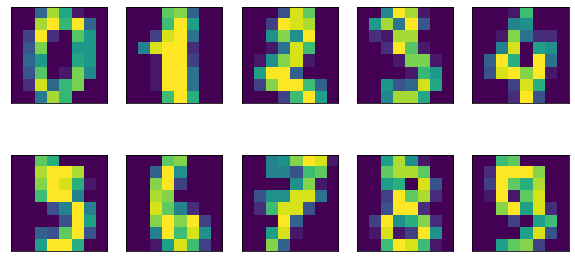

In [3]:
#원래 데이터의 형태를 확인하기 위한 그래프
fig,axes=plt.subplots(2,5,figsize=(10,5),
                     subplot_kw={'xticks':(),'yticks':()})
#딕셔너리 형태로 xticks와 yticks를 선언, for문이 돌아가면서 적용
for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

## PCA(주성분 분석)

In [4]:
#PCA 모델을 생성,학습
pca =PCA(n_components=2)
pca.fit(digits.data)

PCA(n_components=2)

In [5]:
digits_pca = pca.transform(digits.data)
#차원 축소

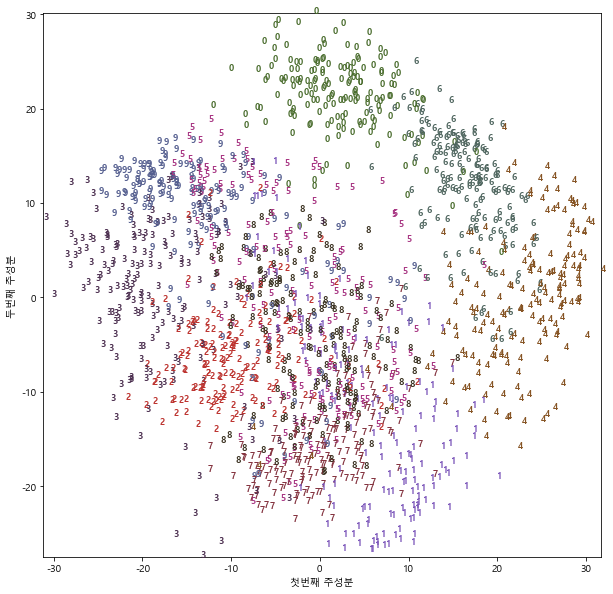

In [6]:
#PCA 데이터 시각화
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max()) #최소값,최대값 0번열
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max()) #최소값,최대값 1번열

for i in range(len(digits.data)):
    
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),
             color=colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()

## T-SNE

In [7]:
from sklearn.manifold import TSNE

#모델 선정(T-SNE)
tsne=TSNE(random_state=42)

In [8]:
#모델 학습 후 변환
digits_tsne = tsne.fit_transform(digits.data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


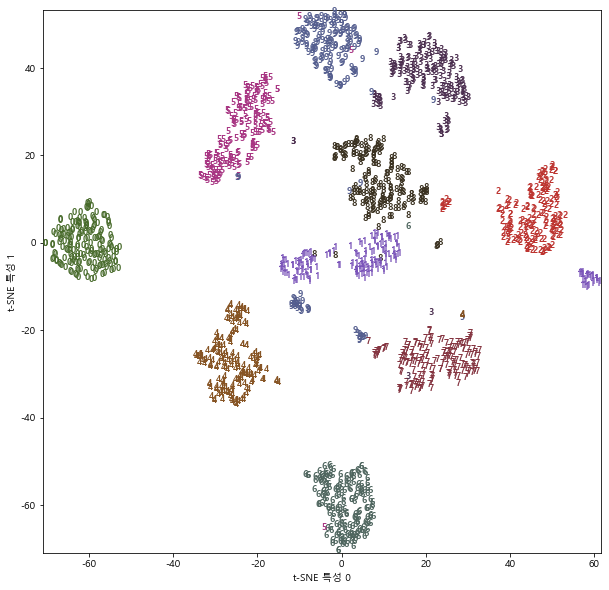

In [10]:
#t-SNE 데이터 시각화
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max() +1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max() +1)

for i in range(len(digits.data)):
    
    plt.text(digits_tsne[i,0],digits_tsne[i,1],
             str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})
plt.xlabel('t-SNE 특성 0')
plt.ylabel('t-SNE 특성 1')
plt.show()